In [1]:
#instal libraries

#pip install sentence-transformers
#pip install umap-learn
#pip install hdbscan

In [1]:
#import libraries

import re
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reads in california constitution

#i need to clean the data more

with open('../DATA/2018.txt', 'r') as f:
    data = f.read()

In [3]:
data

'Scripts.com \nAnt-Man and the Wasp By Chris McKenna \nPage 1/53\n1 \nGone forever. \nTelling you that she \nwasn\'t coming home, \nwas the hardest thing \nthat I ever had to do. \nBut then, Scott showed up... \nOr should I say, broke \ninto our house. \nAnd when he went to \nthe Quantum Realm.... \nAnd came back, \neverything changed. \nI started to wonder... \nCould your Mother \nstill be alive? \nSo I dusted off some old plans. Dad, what are you saying? \nI think it\'s possible, \nto bring her back. \nOkay. We\'re in. \nAw, this place is a maze. \nWhere\'s that map? \nWe\'re definitely close. \n- Are you ready? \n- I\'m ready, Daddy. \nAre you sure? Once we\'re inside, you show any hesitation or fear, - we\'re done. \n- I eat fear for breakfast. \nWow. That is super cool. \nCome on. \nLook! It\'s Anton. He\'ll \nshow us the way. \nAnton, which way do we go? \nAnton, which way do we go? \nThanks, Anton. \nLook! The ants have burrowed \ninto the tech facility. \nOh, no! Lasers! \nOh! 

In [4]:
#data cleaning

def clean(text):
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    return re.sub(pattern, ' ', text)

data = clean(data)
data = data.replace('SEC.', ' ')

In [5]:
#Removes all numbers
data = ''.join([i for i in data if not i.isdigit()])

In [6]:
data = data.split("\n")    

In [7]:
data = [item for item in data if item != '']

In [8]:
data

['Scripts.com ',
 'Ant- Man and the Wasp By  Chris  McKenna ',
 'Page /',
 ' ',
 'Gone forever. ',
 'Telling you that she ',
 "wasn't coming home, ",
 'was the hardest thing ',
 'that   ever had to do. ',
 'But then, Scott showed up... ',
 'Or should   say, broke ',
 'into our house. ',
 'And when he went to ',
 'the Quantum Realm.... ',
 'And came back, ',
 'everything changed. ',
 '  started to wonder... ',
 ' Could your  Mother ',
 'still be alive? ',
 'So   dusted off some old plans.  Dad, what are you saying? ',
 "  think it's possible, ",
 'to bring her back. ',
 "Okay. We're in. ",
 'Aw, this place is a maze. ',
 "Where's that map? ",
 "We're definitely close. ",
 '- Are you ready? ',
 "-  'm ready,  Daddy. ",
 "Are you sure? Once we're inside, you show any hesitation or fear, - we're done. ",
 '-   eat fear for breakfast. ',
 'Wow. That is super cool. ',
 ' Come on. ',
 " Look!  It's Anton. He'll ",
 'show us the way. ',
 'Anton, which way do we go? ',
 'Anton, which way do we 

In [9]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/752 [00:00<?, ?it/s]

In [10]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

In [11]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean', 
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

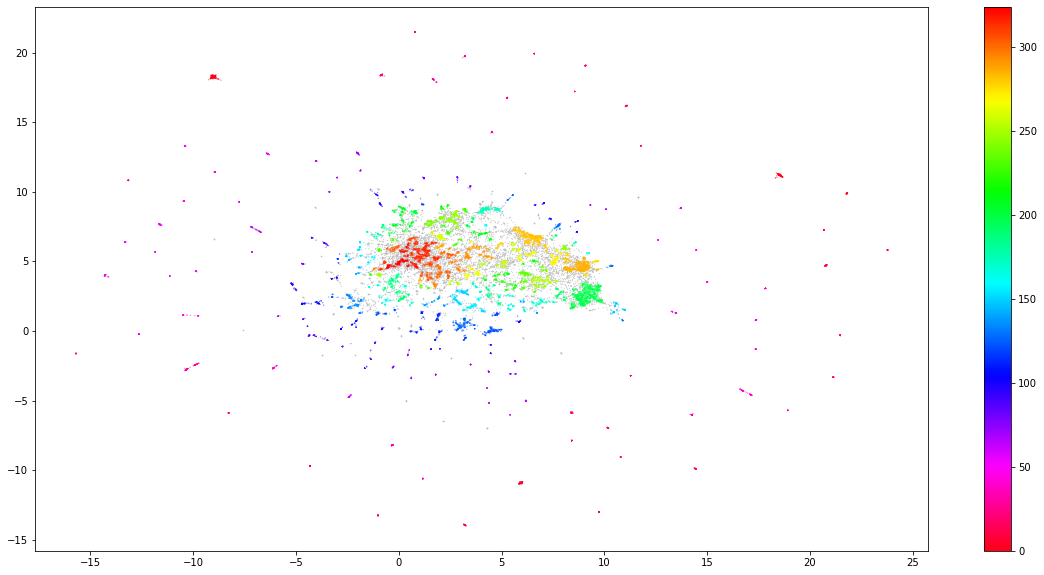

In [12]:
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x','y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20,10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [13]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [14]:
docs_per_topic

,Topic,Doc
0,-1,Ant- Man and the Wasp By Chris McKenna And ...
1,0,T' Challa T' CHALLA T' Challa's T' CHALLA T' C...
2,1,- : . . . . . . . - . . . . . . . ...
3,2,ETHAN * ETHAN * ETHAN * ETHAN * ETHAN * E...
4,3,BRIAN ROGER BRIAN BRIAN BRIAN BRIAN BRIAN...
...,...,...
321,320,Ha! We got it! - Ghost knows where we are. ...
322,321,"learned that. Honey, tell us where you are...."
323,322,to focus. All right? Could we get a picture ...
324,323,"- How'd you do it, Scott? - What color was it..."


In [15]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [16]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

/var/folders/sx/mxg316554p53ftfz37jrsvnr0000gn/T/ipykernel_90927/3267578824.py:5: RuntimeWarning: invalid value encountered in true_divide
  tf = np.divide(t.T, w)


In [17]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,7033
199,198,993
287,286,607
282,281,599
317,316,423
2,1,319
1,0,247
127,126,244
9,8,197
123,122,179


In [18]:
len(top_n_words)

170

In [18]:
index = [198,286,281,316,1,0,126,8]

In [19]:
for i in index:
    print("Topic #", i-1)
    print(top_n_words[i][:7])
    print()

Topic # 197
[('don', 0.4364288301468694), ('didn', 0.12658629789759193), ('know', 0.11758469125174772), ('doesn', 0.076122778205851), ('won', 0.0639948142785726), ('wouldn', 0.06355572449290099), ('just', 0.051701857651720515)]

Topic # 285
[('fuck', 0.1043555371644308), ('shit', 0.08846673702367082), ('bad', 0.0860636864837025), ('terrible', 0.058395290187184784), ('worse', 0.048483863931325595), ('lie', 0.04725086426642758), ('wrong', 0.0462219542661104)]

Topic # 280
[('ethan', 0.09525271369409614), ('walker', 0.054865658103498076), ('freddie', 0.04879565474089161), ('thanos', 0.03291939486209884), ('brian', 0.031633628305640676), ('lark', 0.02850731023039092), ('truck', 0.027944863559605657)]

Topic # 315
[('help', 0.21376480353457472), ('need', 0.1858985816267963), ('just', 0.124344056876917), ('ll', 0.12431731497316761), ('work', 0.11204703128723935), ('trying', 0.09886240696418644), ('gonna', 0.09398297793063984)]

Topic # 0
[('means', 7.092241158605468), ('fiery', 0.0), ('fierc